# Second Phase of Project Practice

# Name of the Project: World Happiness Score

Import necessary libraries required

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


Downloading the dataset from github/masters and importing here in Jupyter notebook 

In [45]:
df=pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


OBSERVATIONS:
1. This dataset contains 158 rows and 12 columns. Columns are country, region, rank, standard error, Economy(GDP),family, health
   freedom, corruption, generosity, and dystopia residual.
2. We can see both numerical data as well as categorical data in the dataset.
3. The happiness score is rated on the basis of 1 to 10 scale and it is the target variable, which is again continuous. So, on 
   the basis of this, we can apply linear regression methods on the dataset.
4. Also by examining the dataset, we can say that happiness score is increasing if people have family with healthy life style,
   good economy, and freedom. That is all these columns are positively related to the target.
5. We can observe that region and country are just features, which dont contribute to the target.  


# EXPLORATORY DATA ANALYSIS 

In [3]:
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
df.shape #(total rows=158 and total columns=12 along with target variable)

(158, 12)

In [6]:
df.keys() #Columns of the dataset

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
df.columns.tolist() #(Columns stored in a list format)

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [9]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

There are three data types here, object, integer and float datatypes. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

From the above information, we can see that country and region have object datatypes and rank has integer datatype, the rest
are float datatypes. 
Range of the dataset is 0 to 157, memory usage is 14.9+ KB

In [11]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null values present in any of the columns. So, no extra steps of filling, dropping or replacing are needed here.

<AxesSubplot:>

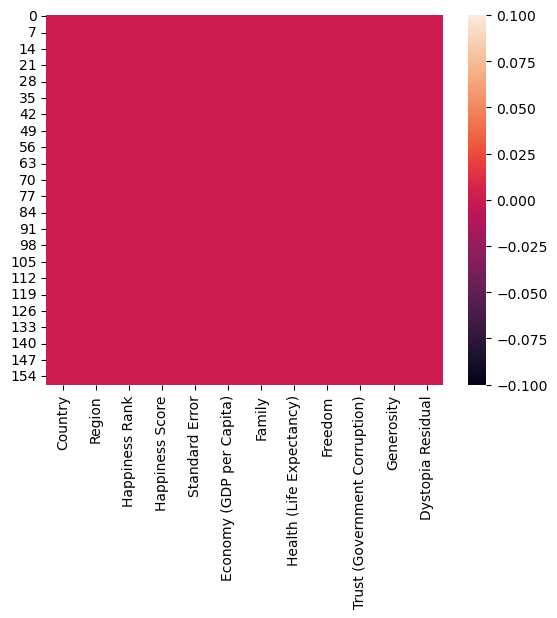

In [12]:
sns.heatmap(df.isnull())

From above methods, we can see that there no null values in the dataset. 0 is the color of the graph.

# Finding out value_counts of each of the columns in dataset

In [13]:
for i in df:
    print(df[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

The value_counts show that there are no widespaces or missing values present. It is now easier to go ahead as data is clean.

# To find the unique values of target/label 

In [14]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [15]:
df['Happiness Score'].nunique()

157

In [16]:
df.nunique().to_frame("Happiness Unique Values")

,Happiness Unique Values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


# There are 157 unique values in target/label. 
The number of rows is 158 and unique target values is 157. So, from here we can conclude that it is a regression based problem.
The difference between unique count and number of rows of target column is just 1. We can go ahead with regressors to predict
the happiness score as it is also a continous value.

# Statistical Summary of the dataset

In [17]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations:
1.  All the rows are equal in number. Therefore, no missing values.
2.  No negative values, so the data summary is excellent.
3.  Skewness:  There is just minor difference between the mean and median for most columns except slight changes in Economy and 
    family variables which are left skewed (again just minor difference).
4.  Outliers: Again, we can note that there is very less difference between the 75th percentile and max values. There are
    outliers in rank, standard error, economy, life expectancy, corruption, dystopia residual, generoosity (though few outliers).
5.  Standard deviation for almost all the features is less than 1 except rank.  The above statistical method shows 25th percentile
    and minimum values also.
    

<AxesSubplot:>

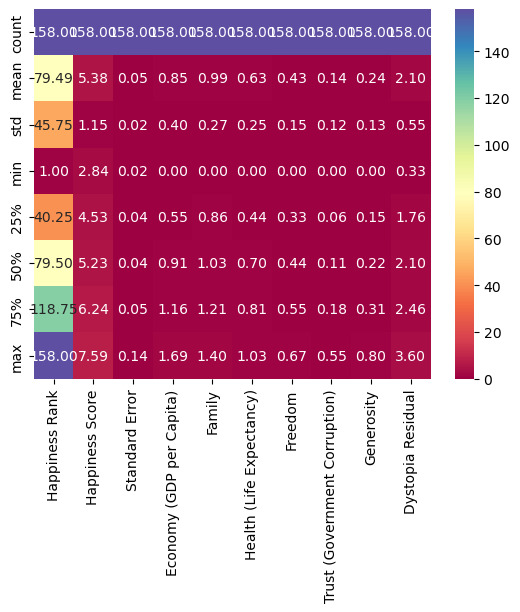

In [16]:
sns.heatmap(df.describe(), annot=True, fmt='0.2f',  linecolor='black', cmap='Spectral')

The heatmap shows the statistical values of the dataset. The graph also shows the 25th, 50th, 75th
percential values. Mean is less than median in Family variable, which means it is left skewed. This is 
same on the df(describe) nongraphical method above. Similarly, we can see outliers when comparing
75Th percential en max values in all columns, which is less, not too much outliers.

# GRAPHICAL EXPLORATORY DATA ANALYSIS

# Univariate Analysis

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


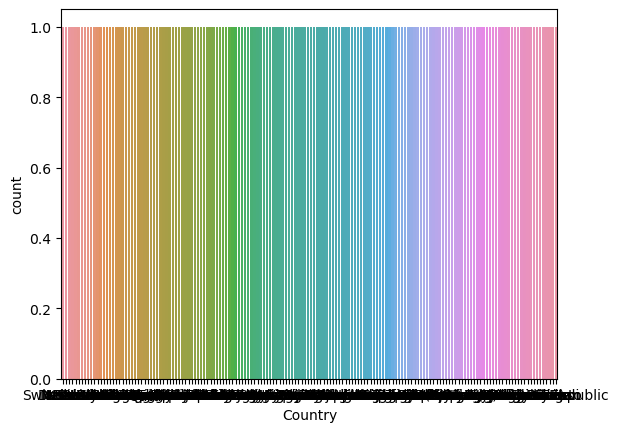

In [18]:
ax=sns.countplot(x='Country', data=df) #Countplot for categorical data
print(df['Country'].value_counts())

The graph shows that all the countries have equal count of happiness score (just the count and not actual happiness score). 

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


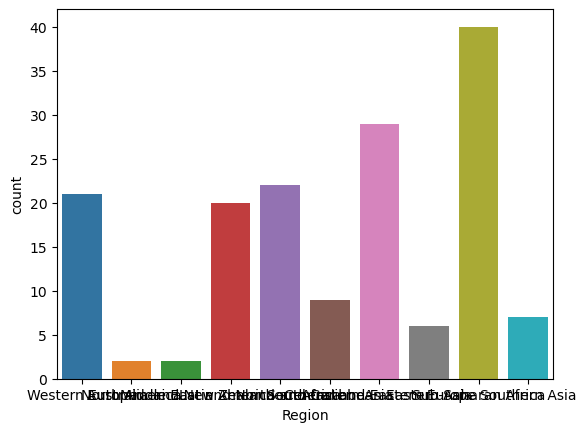

In [25]:
bx=sns.countplot(x='Region', data=df) #Countplot for categorical data
print(df['Region'].value_counts())

The above plot shows the countries having highest value count is Sub-Saharan_Africa and Australia and New Zealand have
lowest value counts.

# Dividing data into numerical/categorical column for graphical EDA

In [46]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:", categorical_col)
    

Categorical columns: ['Country', 'Region']


In [47]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:", numerical_col)

Numerical columns: ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


# Box Plots for detecting outliers

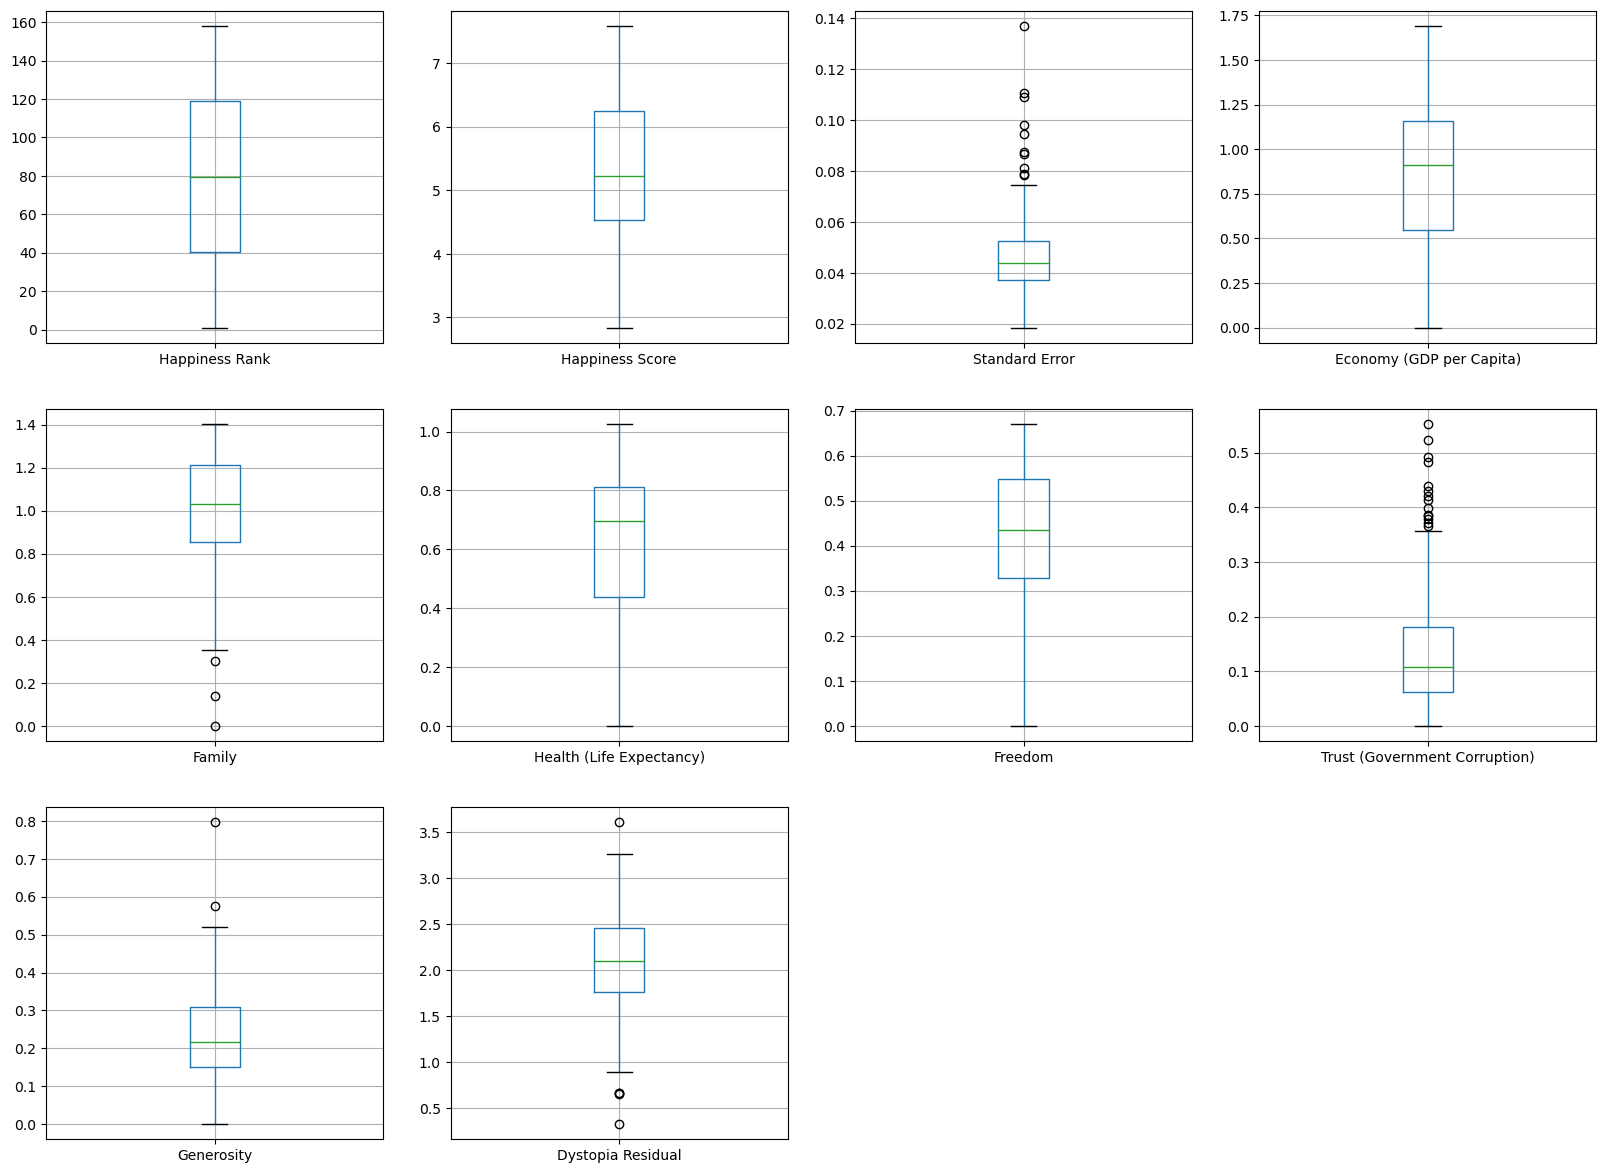

In [21]:
plt.figure(figsize=(20, 25))
p=1
for column in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        df.boxplot(column)
    p+=1
plt.show()


The box plot gives insight that Standard Error, Generosity, Family, Corruption and Dystopia Residual columns have outliers.

# Z score method to remove outliers.

In [48]:
out_features=df[['Standard Error', 'Family', 'Health (Life Expectancy)', 'Freedom',
               'Trust (Government Corruption)',
               'Generosity', 'Dystopia Residual']]

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(out_features)) 
z

,Standard Error,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.805926,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.055889,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.854487,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.531526,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,0.722845,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...
153,0.774917,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,0.662582,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,0.132534,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,2.263962,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [32]:
np.where(z>3)  #(Checking for outliers where zscore is greater than 3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([4, 0, 0, 0, 5, 1, 4, 6, 1], dtype=int64))

In [34]:
z.iloc[27, 4] #Zscore is greater than 3.

3.1646194851713774

In [35]:
z.iloc[157,1] #zscore is greater than 3.

3.1347248549706186

In [50]:
df1=df[(z<3).all(axis=1)] #(zscore is applied to the whole data set for values less than 3)

In [51]:
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [25]:
df1.shape

(149, 12)

In [26]:
df.shape

(158, 12)

In [28]:
print("Old DataFrame:", df.shape[0])
print("New DataFrame:", df1.shape[0])
print("Dataloss percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Old DataFrame: 158
New DataFrame: 149
Dataloss percentage: 5.69620253164557


There is 5% dataloss occuring with zscore method

In [52]:
df=df1
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


# Histogram Charts

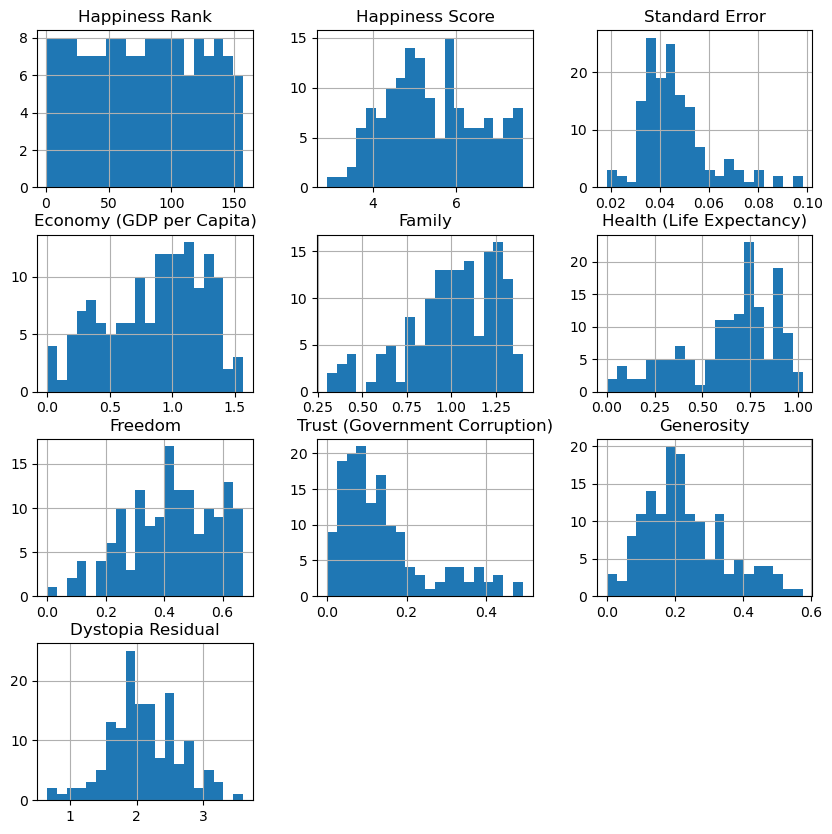

In [43]:
#Histograms can be used as univariate analysis
df.hist(bins=20, figsize=(10, 10))
plt.show()

# There is right-ward skewness in corruption and left-ward skewness in family and health.

# Bivariate Analysis

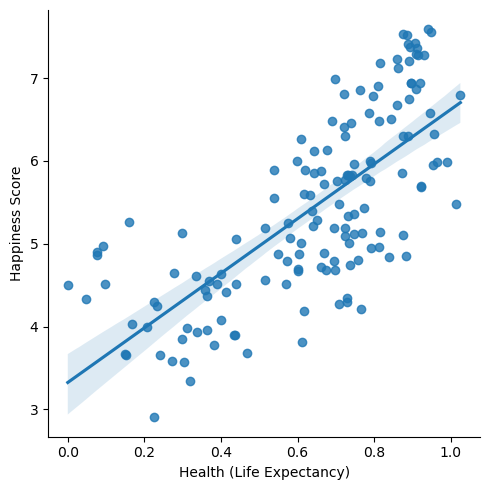

In [17]:
sns.lmplot(x='Health (Life Expectancy)', y='Happiness Score', data=df, palette='colorblind')

We can notice that Happiness Score is positively and very strongly correlated with Healthj(Life Expectancy). 

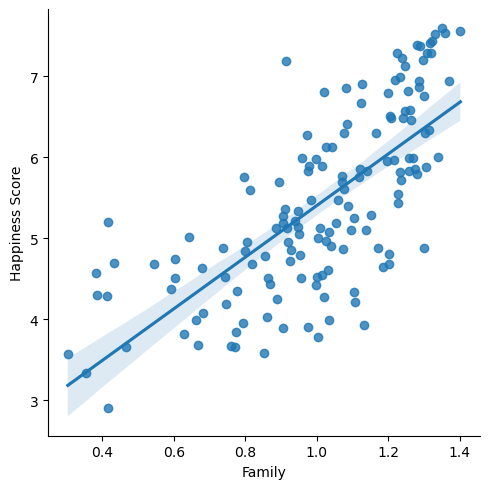

In [82]:
sns.lmplot(x='Family', y='Happiness Score', data=df, palette='colorblind')

Similarly, Happiness Score is again stronly and positively corerlated with Family also. Those who had family were more happier.
Therefore, Family has more contribution to the Happiness score.

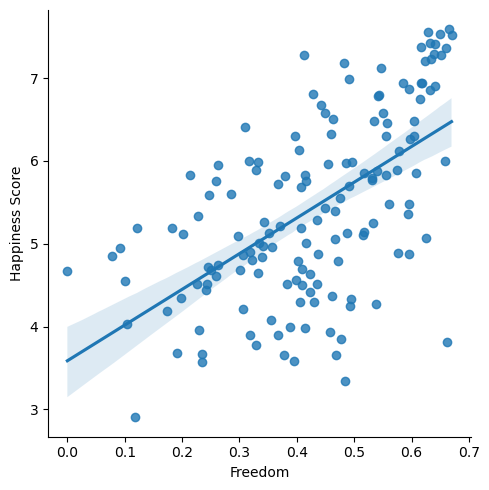

In [83]:
sns.lmplot(x='Freedom', y='Happiness Score', data=df, palette='colorblind')

Here also, we see there is a positive correlation with Freedom and Happiness Score and all the points are almost near the best
fit line. So this is also a contributing factor.

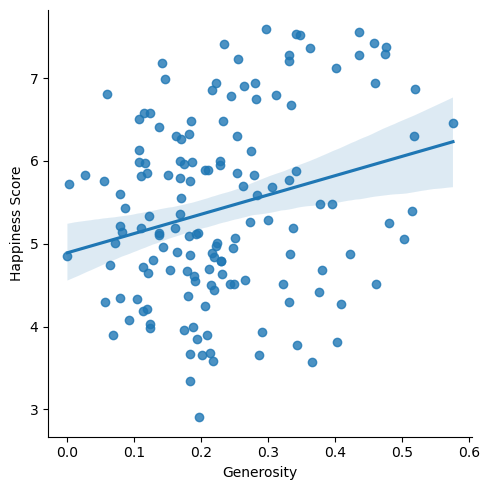

In [90]:
sns.lmplot(x='Generosity', y='Happiness Score', data=df, palette='colorblind')

We can predict that generosity and happiness score are postively correlated  but not very strongly, yet it has positive impact
on happiness.

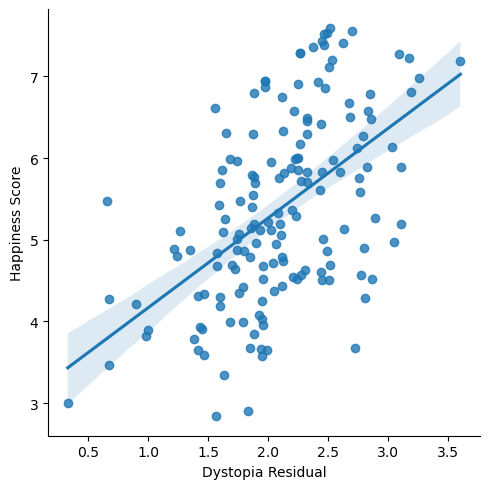

In [9]:
sns.lmplot(x='Dystopia Residual', y='Happiness Score', data=df, palette='colorblind')


Dystopia Residual and Happiness Score have a positive correlation but not as strong

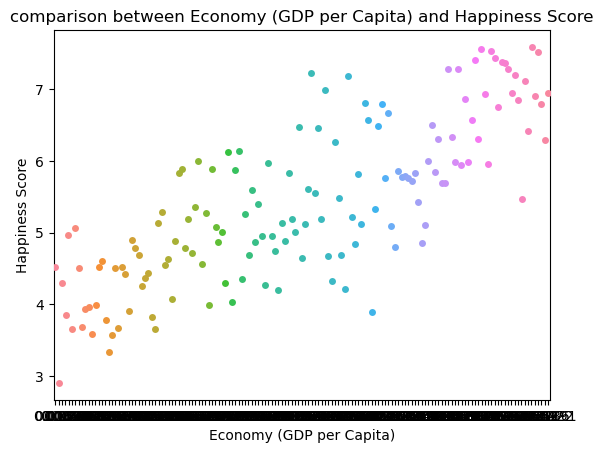

In [31]:
plt.title("comparison between Economy (GDP per Capita) and Happiness Score")
sns.stripplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df)
plt.show()
     

we can see that as Economy increases, Happiness score is showing increasing points. So we can
say that if a person's income is more, he will be more happier and so this is strong contributing
factor to the data.

In [ ]:
plt.title("comparison between Freedom and FAmily with third variable Happiness Score")
sns.stripplot(x='Freedom', y='Happiness Score', data=df, hue='Sex')
plt.show() 

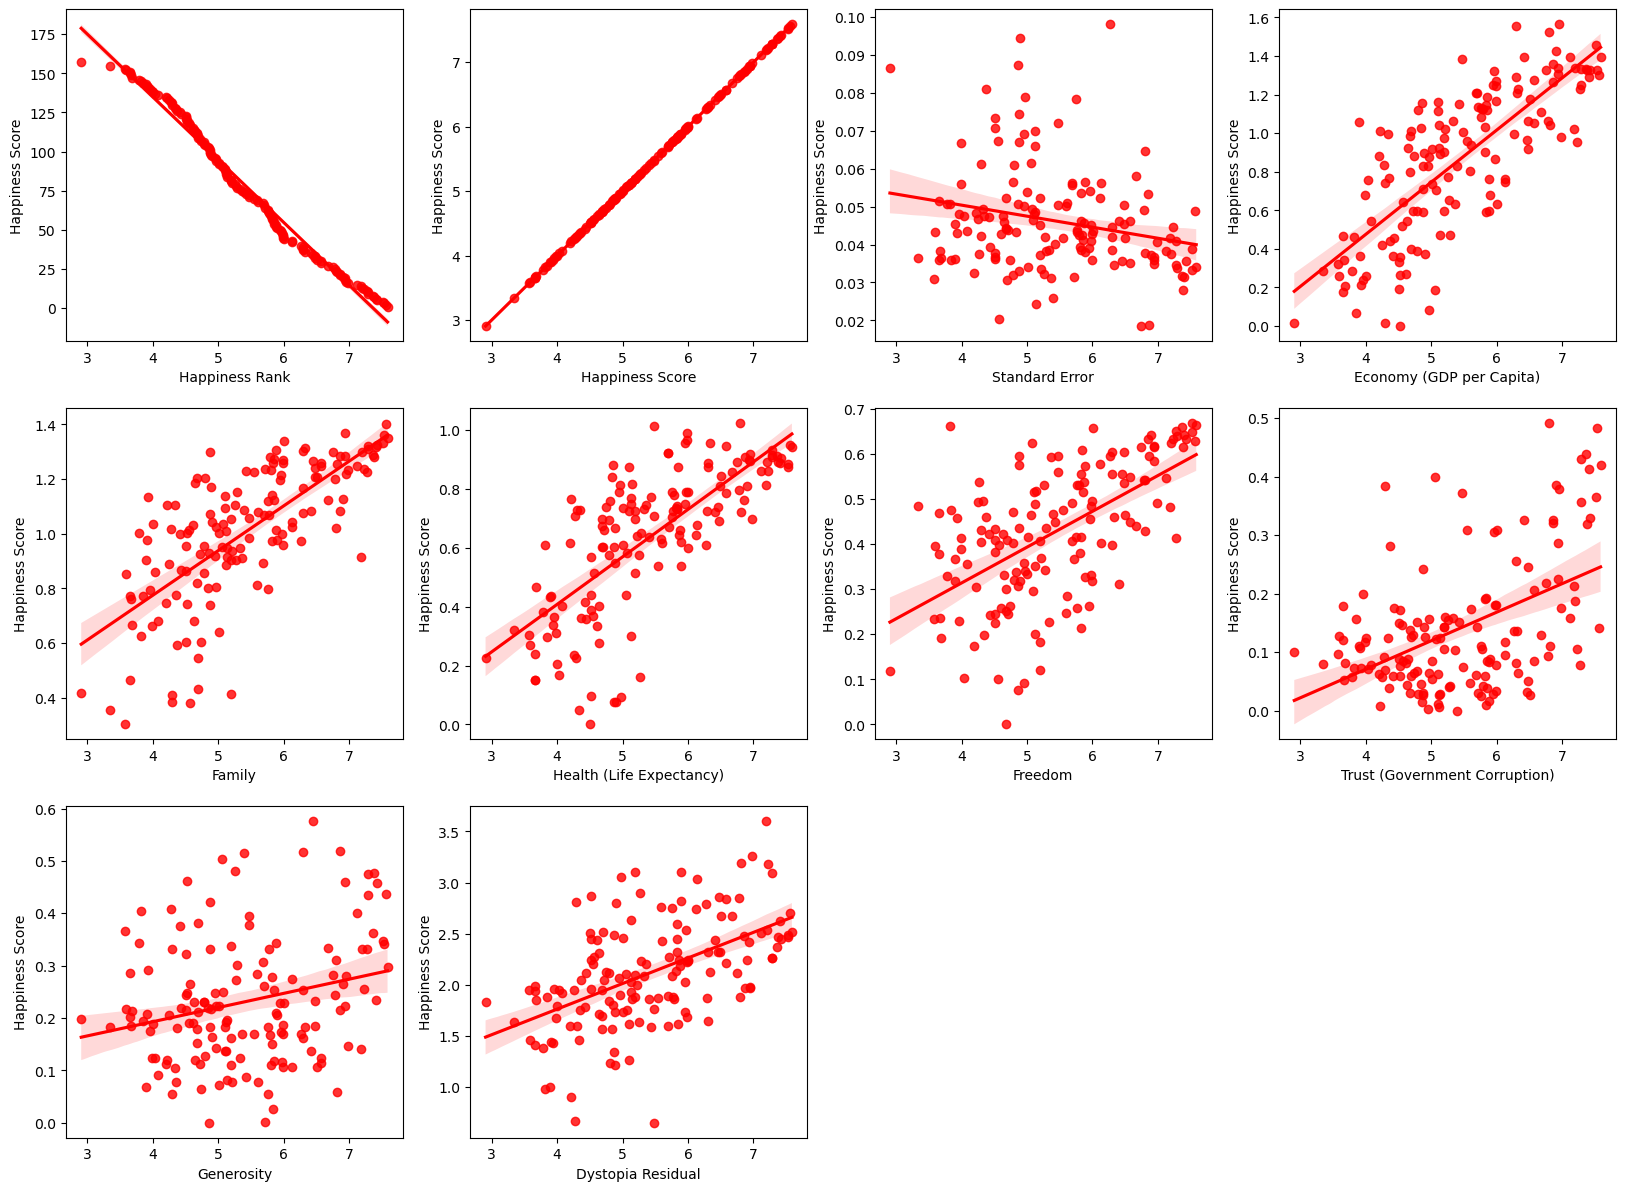

In [49]:
plt.figure(figsize=(20, 25))
p=1
for i in df[numerical_col]:
    if p<=13:
        plt.subplot(5,4,p)
        sns.regplot(x='Happiness Score',y = i, data=df, color='r')
        plt.xlabel(i)
        plt.ylabel('Happiness Score')
    p+=1
plt.show()

The regplot shows that all the variables are positively related with target/label except for Standard Error and Corruption indicating that if corruption is less, Happiness Score may increae.
Also generosity is not so higher side to the contribution of Happiness Score, just positively correlated.

# Multivariate Analysis

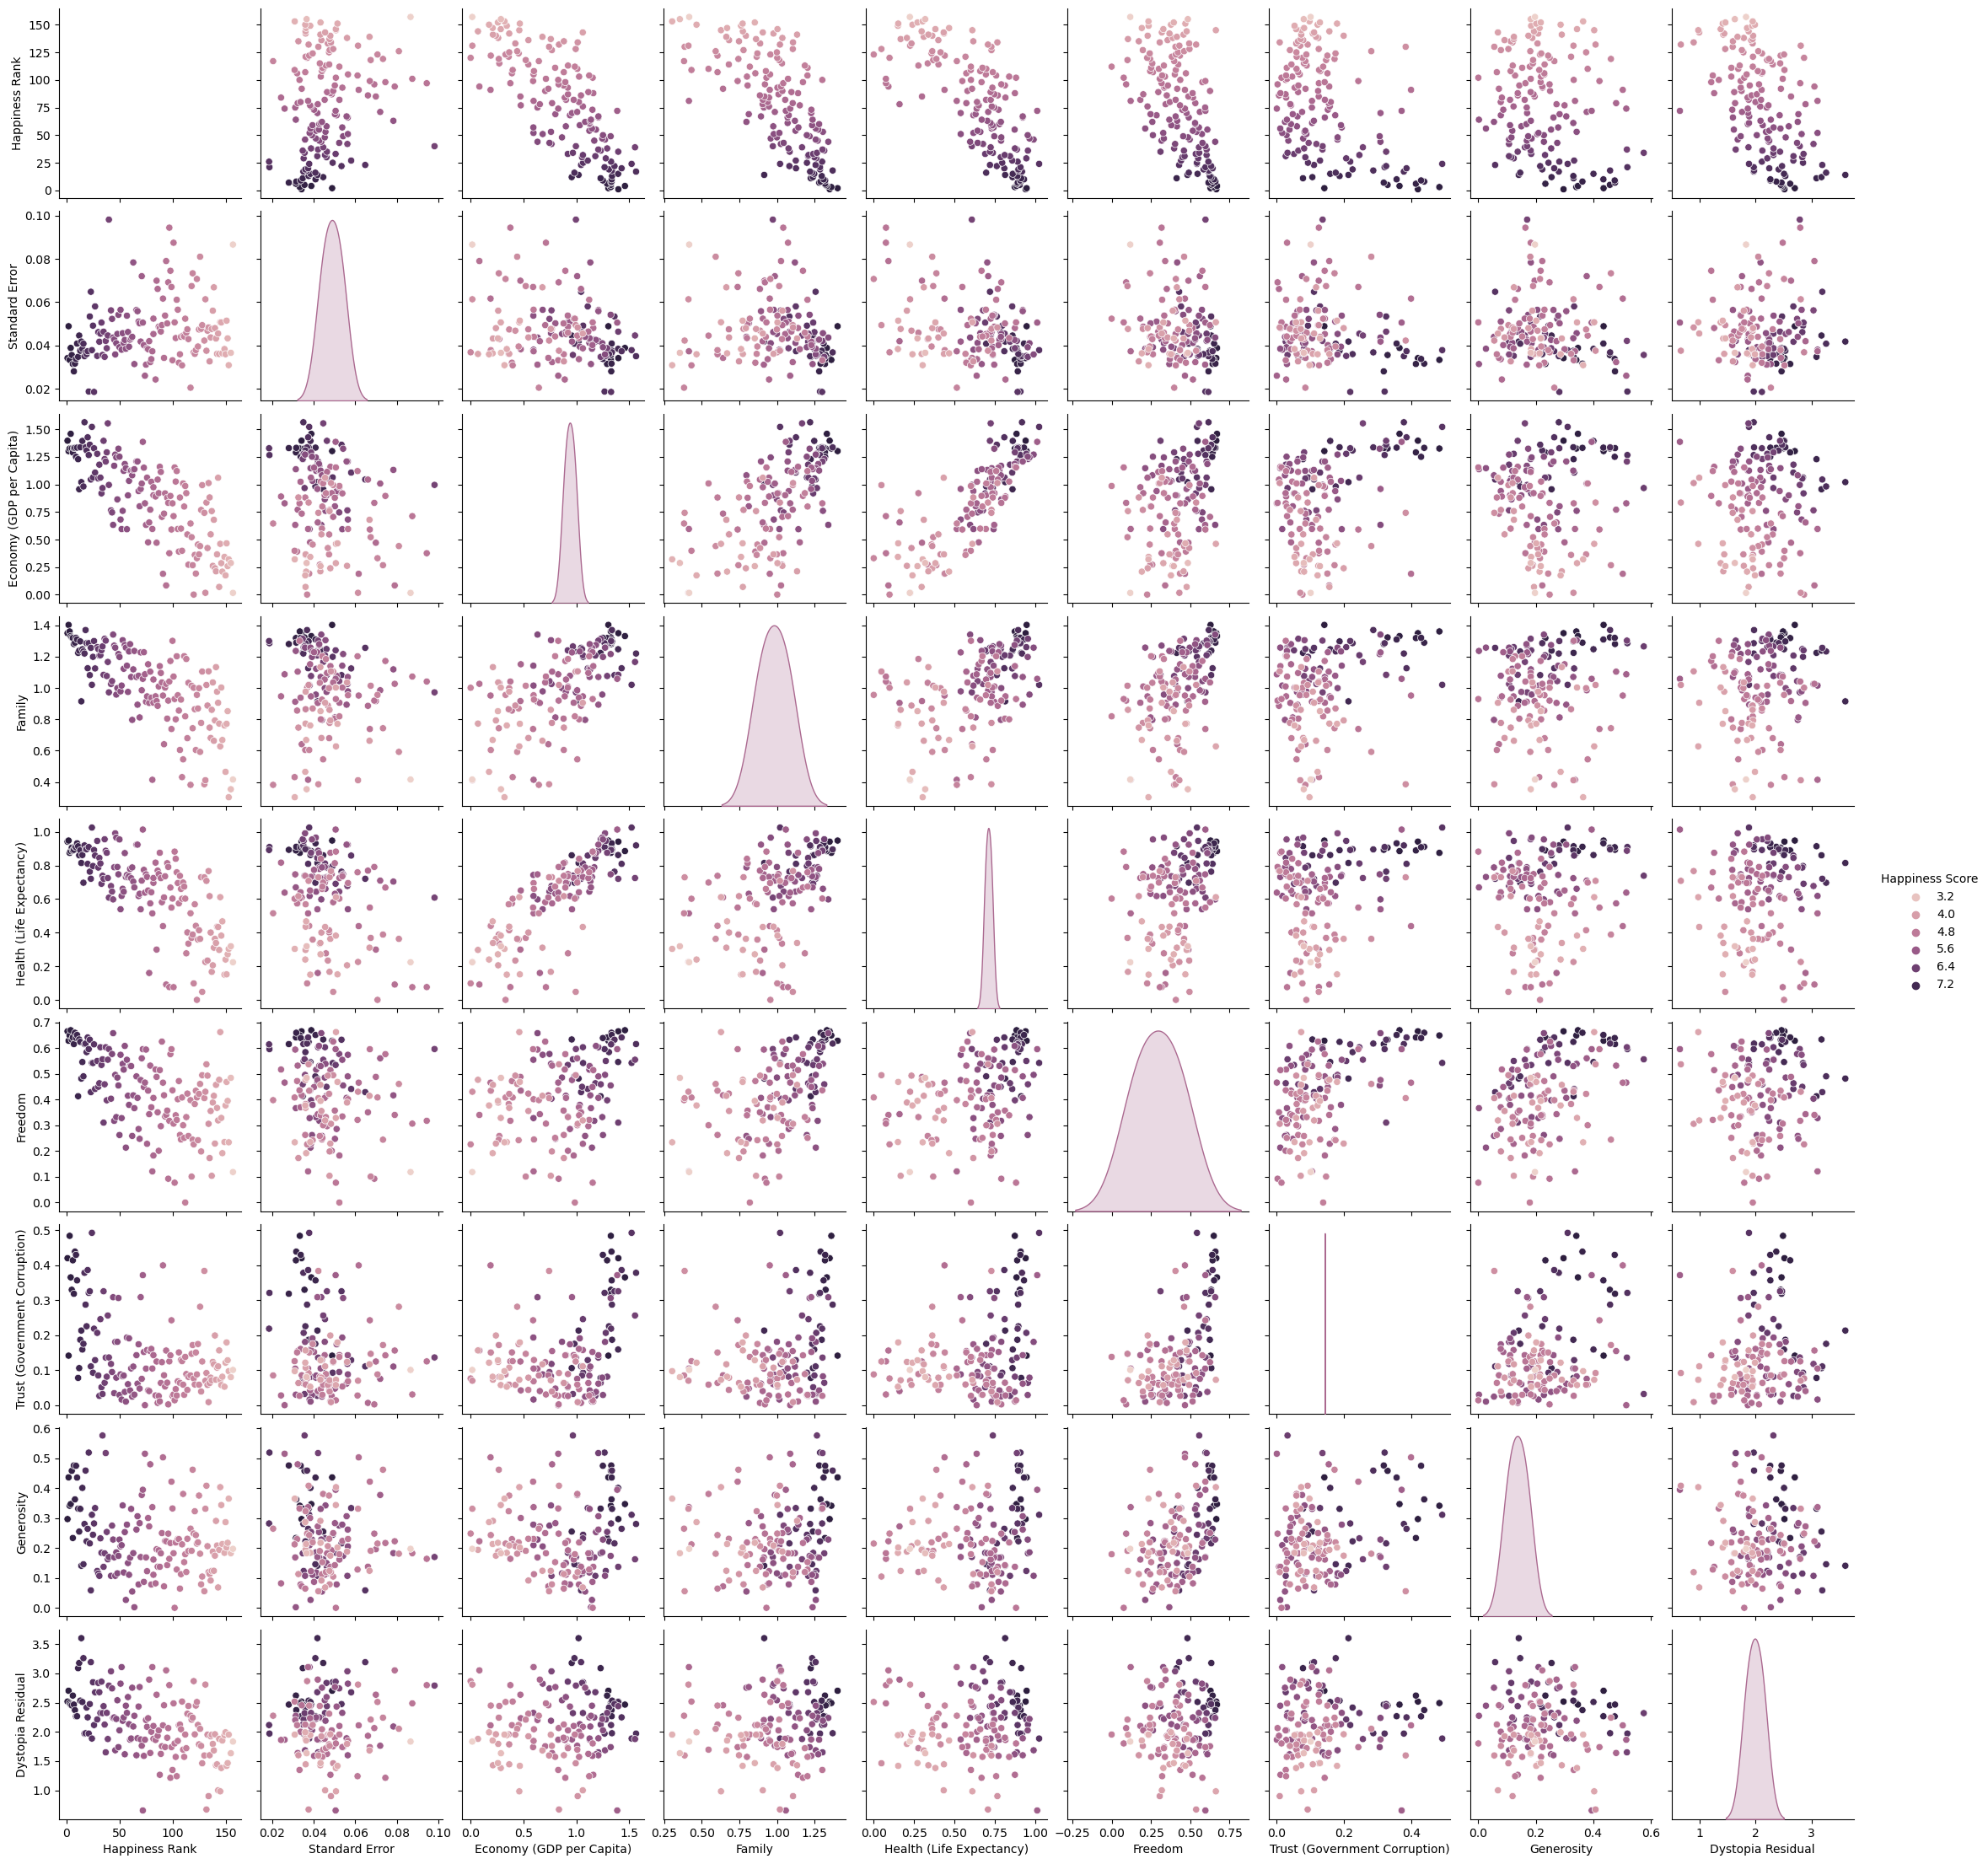

In [17]:
sns.pairplot(data=df, hue='Happiness Score')

The pairplot shows pairwise relationship with each variable. 
The diagnol represents the distribution of data. 

# Checking skewness for the data


In [53]:
df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

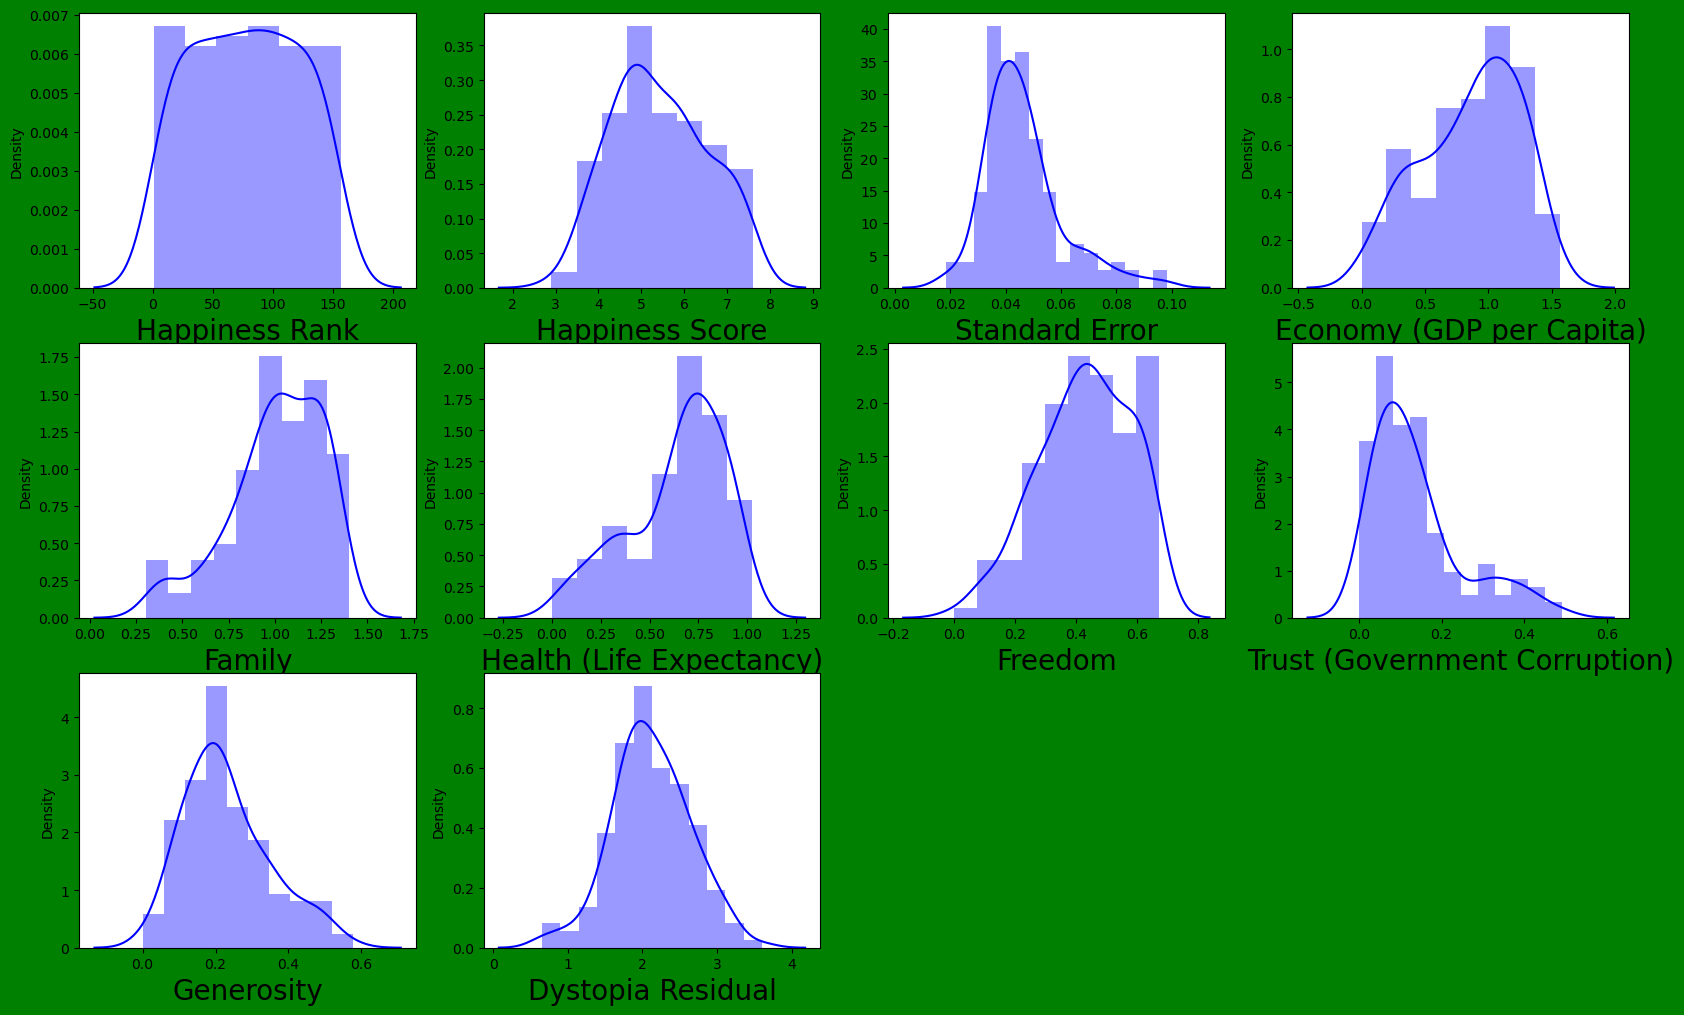

In [32]:
plt.figure (figsize=(20, 25), facecolor='green')
plotnumber=1
for column in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()


In [54]:
df['Standard Error']=np.sqrt(df['Standard Error'])
df['Trust (Government Corruption)']=np.sqrt(df['Trust (Government Corruption)'])
df['Family']=np.sqrt(df['Family'])
df['Generosity']=np.sqrt(df['Generosity'])
df['Health (Life Expectancy)']=np.cbrt(df['Health (Life Expectancy)'])


In [ ]:
sns.distplot(df['Standard Error'], color='m', kde_kws={"shade":True}, hist='false')

In [55]:
df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.717347
Economy (GDP per Capita)        -0.390657
Family                          -1.182069
Health (Life Expectancy)        -2.067331
Freedom                         -0.400867
Trust (Government Corruption)    0.437253
Generosity                      -0.285799
Dystopia Residual               -0.021144
dtype: float64

I tried to reduce the skewness by cbrt method also, but I am proceeding iwth sqrt method and since Health had just 0.1 skewness
compared to normal, I am leaving at it. Tried boxcox and log method which is giving Nan values.

In [56]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992921,0.218151,-0.773651,-0.695946,-0.636787,-0.571089,-0.397311,-0.199823,-0.526680
Happiness Score,-0.992921,1.000000,-0.236068,0.773577,0.695933,0.623803,0.585066,0.427308,0.223529,0.528334
Standard Error,0.218151,-0.236068,1.000000,-0.247136,-0.100658,-0.360536,-0.198629,-0.113976,-0.107474,0.032865
Economy (GDP per Capita),-0.773651,0.773577,-0.247136,1.000000,0.612236,0.712172,0.376780,0.268712,-0.025046,0.026936
Family,-0.695946,0.695933,-0.100658,0.612236,1.000000,0.383038,0.446855,0.184843,0.107062,0.106988
Health (Life Expectancy),-0.636787,0.623803,-0.360536,0.712172,0.383038,1.000000,0.320595,0.157396,0.065127,-0.008040
Freedom,-0.571089,0.585066,-0.198629,0.376780,0.446855,0.320595,1.000000,0.498882,0.433225,0.058596
Trust (Government Corruption),-0.397311,0.427308,-0.113976,0.268712,0.184843,0.157396,0.498882,1.000000,0.281922,0.099828
Generosity,-0.199823,0.223529,-0.107474,-0.025046,0.107062,0.065127,0.433225,0.281922,1.000000,-0.018791
Dystopia Residual,-0.526680,0.528334,0.032865,0.026936,0.106988,-0.008040,0.058596,0.099828,-0.018791,1.000000


<AxesSubplot:>

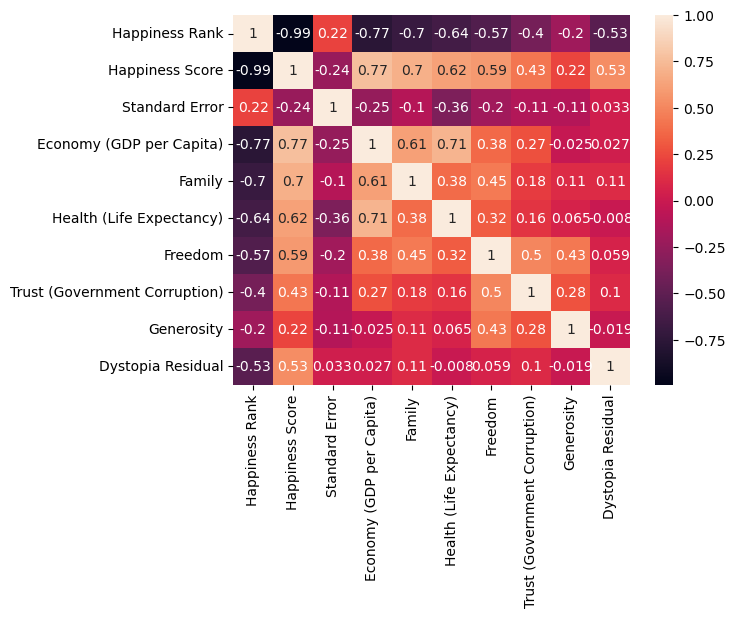

In [57]:
sns.heatmap(df.corr(), annot=True)

There is no multicollinearity issue over here. No column has same values with respect to other variables.

# Splitting x and y

In [61]:
x=df.drop(['Happiness Score'], axis=1)
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,0.184689,1.39651,1.161684,0.980083,0.66557,0.647904,0.544775,2.51738
1,Iceland,Western Europe,2,0.220998,1.30232,1.184158,0.982302,0.62877,0.376098,0.660530,2.70201
2,Denmark,Western Europe,3,0.182428,1.32548,1.166439,0.956334,0.64938,0.695392,0.584286,2.49204
3,Norway,Western Europe,4,0.196977,1.45900,1.153668,0.960171,0.66973,0.604177,0.589059,2.46531
4,Canada,North America,5,0.188494,1.32629,1.150048,0.967498,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,Ivory Coast,Sub-Saharan Africa,151,0.226738,0.46534,0.878151,0.533505,0.46866,0.423344,0.449055,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,0.207942,0.25812,0.922973,0.647326,0.39493,0.358218,0.466337,1.46494
152,Afghanistan,Southern Asia,153,0.175613,0.31982,0.550318,0.671916,0.23414,0.311753,0.604235,1.95210
154,Benin,Sub-Saharan Africa,155,0.191207,0.28665,0.594861,0.683349,0.48450,0.283019,0.427317,1.63328


In [62]:
x=df.drop(['Country', 'Region', 'Happiness Score'], axis=1) #Country and Region are just labels, so droping them is best option.
x

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,0.184689,1.39651,1.161684,0.980083,0.66557,0.647904,0.544775,2.51738
1,2,0.220998,1.30232,1.184158,0.982302,0.62877,0.376098,0.660530,2.70201
2,3,0.182428,1.32548,1.166439,0.956334,0.64938,0.695392,0.584286,2.49204
3,4,0.196977,1.45900,1.153668,0.960171,0.66973,0.604177,0.589059,2.46531
4,5,0.188494,1.32629,1.150048,0.967498,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...,...,...
150,151,0.226738,0.46534,0.878151,0.533505,0.46866,0.423344,0.449055,1.41723
151,152,0.207942,0.25812,0.922973,0.647326,0.39493,0.358218,0.466337,1.46494
152,153,0.175613,0.31982,0.550318,0.671916,0.23414,0.311753,0.604235,1.95210
154,155,0.191207,0.28665,0.594861,0.683349,0.48450,0.283019,0.427317,1.63328


In [63]:
y=df.iloc[:, 3:4]
y

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
150,3.655
151,3.587
152,3.575
154,3.340


# Scaling Techniques need to be applied with the help of StandardScaler

In [64]:
from sklearn.preprocessing import StandardScaler 
st=StandardScaler() #scaling applied and we can see the uniformity in the values
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8
0,-1.713905,-0.903989,1.381916,1.221104,0.937316,1.583704,2.077762,0.625014,0.756876
1,-1.691535,0.264414,1.138324,1.385725,0.951923,1.338953,0.211895,1.510004,1.109300
2,-1.669166,-0.976742,1.198220,1.255934,0.781010,1.476027,2.403751,0.927088,0.708507
3,-1.646796,-0.508559,1.543526,1.162387,0.806264,1.611371,1.777588,0.963577,0.657485
4,-1.624427,-0.781542,1.200315,1.135869,0.854489,1.366887,1.570993,1.634686,0.631620
...,...,...,...,...,...,...,...,...,...
144,1.641542,0.449125,-1.026255,-0.855769,-2.001976,0.274090,0.536221,-0.106807,-1.343100
145,1.663911,-0.155705,-1.562163,-0.527449,-1.252824,-0.216276,0.089150,0.025323,-1.252030
146,1.686281,-1.196042,-1.402596,-3.257145,-1.090982,-1.285662,-0.229816,1.079607,-0.322135
147,1.731020,-0.694250,-1.488379,-2.930866,-1.015732,0.379439,-0.427065,-0.272997,-0.930702


# Finding the best score on random_state value and fitting for training and testing data 

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [67]:
maxAcc=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2_score is:", maxAcc, "on Random_State", maxRS)

Maximum r2_score is: 0.9979115308081521 on Random_State 115


# The maximum r2_score is 99% with random_state of 115. We can apply this random_state to all the models to learn.

# Training and Testing the data 

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30, random_state=maxRS)

In [71]:
x_train.shape

(104, 9)

In [72]:
y_train.shape

(104, 1)

In [73]:
x_test.shape

(45, 9)

In [74]:
y_test.shape

(45, 1)

# Fitting the data to different types of regressors to predict the r2 score

In [80]:
lr=LinearRegression()
lr.fit(x_train, y_train)
pred_lr=lr.predict(x_test)
print("R2_Score: ", r2_score(y_test, pred_lr))
pred_train=lr.predict(x_train)
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print("Error:")
print("Mean squared error:", mean_squared_error(y_test, pred_lr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_lr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_lr)))
      

R2_Score:  0.9946010700729101
R2_score on training data: 99.6595988381733
Error:
Mean squared error: 0.005428013746649988
Mean_absolute_error 0.05838159460869927
Root_mean_Squared_error: 0.07367505511806549


In [81]:
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr=rfr.predict(x_test) 
pred_train=rfr.predict(x_train)
print('R2_score', r2_score(y_test, pred_rfr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_rfr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_rfr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_rfr)))
      

R2_score 0.9889911241273046
R2_score on training data: 99.9663858985011
Mean squared error: 0.01106818024666652
Mean_absolute_error 0.03928422222222213
Root_mean_Squared_error: 0.10520541928373518


In [82]:
svc=SVR()
svc.fit(x_train, y_train)
pred_svc=svc.predict(x_test) 
pred_train=svc.predict(x_train)
print('R2_score', r2_score(y_test, pred_svc))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_svc))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_svc))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_svc)))
      

R2_score 0.8914454236757557
R2_score on training data: 99.25905659833025
Mean squared error: 0.10913935548471998
Mean_absolute_error 0.1918331887753777
Root_mean_Squared_error: 0.33036246076804787


In [83]:
knn=KNN()
knn.fit(x_train, y_train)
pred_knn=knn.predict(x_test) 
pred_train=knn.predict(x_train)
print('R2_score', r2_score(y_test, pred_knn))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_knn))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_knn))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_knn)))
      

R2_score 0.8687131357528912
R2_score on training data 96.49968021809372
Mean squared error: 0.13199410133333336
Mean_absolute_error 0.2775466666666666
Root_mean_Squared_error: 0.36330992462817935


In [86]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train, y_train)
pred_dtc=dtc.predict(x_test) 
pred_train=dtc.predict(x_train)
print('R2_score', r2_score(y_test, pred_dtc))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_dtc))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_dtc))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_dtc)))
      

R2_score 0.9858779637333758
R2_score on training data 100.0
Mean squared error: 0.014198111111111128
Mean_absolute_error 0.062244444444444505
Root_mean_Squared_error: 0.11915582701282858


In [87]:
la=Lasso()
la.fit(x_train, y_train)
pred_la=la.predict(x_test) 
pred_train=la.predict(x_train)
print('R2_score', r2_score(y_test, pred_la))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_la))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_la))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_la)))
      

R2_score 0.23467099004677394
R2_score on training data 27.13777767319011
Mean squared error: 0.7694518067166838
Mean_absolute_error 0.7409619454975342
Root_mean_Squared_error: 0.8771840210108046


In [88]:
rd=Ridge()
rd.fit(x_train, y_train)
pred_rd=rd.predict(x_test) 
pred_train=rd.predict(x_train)
print('R2_score', r2_score(y_test, pred_rd))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_rd))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_rd))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_rd)))
      

R2_score 0.9948055996857013
R2_score on training data 99.65465061203443
Mean squared error: 0.005222382341015825
Mean_absolute_error 0.058271623465178765
Root_mean_Squared_error: 0.07226605247981811


# From the above regressor methods, we see that Ridge and LinearRegression gives the best outcome with r2_score of 99 and¶training R2_score is also 99.9.


# Cross-Validation_score()

In [89]:
from sklearn.model_selection import cross_val_score

In [119]:
score=cross_val_score(lr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_lr)-score.mean())

[0.70661001 0.88146883 0.90672079 0.10618419 0.95488282]
0.7111733275156606
Difference between R2 Score and cross validation score is: 0.28342774255724945


In [118]:
score2=cross_val_score(rfr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_rfr)-score.mean())

[0.70661001 0.88146883 0.90672079 0.10618419 0.95488282]
0.7111733275156606
Difference between R2 Score and cross validation score is: 0.27781779661164396


In [117]:
score3=cross_val_score(knn, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_knn)-score.mean())

[0.70661001 0.88146883 0.90672079 0.10618419 0.95488282]
0.7111733275156606
Difference between R2 Score and cross validation score is: 0.15753980823723057


In [116]:
score4=cross_val_score(dtc, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_dtc)-score.mean())

[0.70661001 0.88146883 0.90672079 0.10618419 0.95488282]
0.7111733275156606
Difference between R2 Score and cross validation score is: 0.2747046362177151


In [114]:
score5=cross_val_score(la, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_la)-score.mean())

[0.70661001 0.88146883 0.90672079 0.10618419 0.95488282]
0.7111733275156606
Difference between R2 Score and cross validation score is: -0.4765023374688867


In [115]:
score6=cross_val_score(rd, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_rd)-score.mean())

[0.70661001 0.88146883 0.90672079 0.10618419 0.95488282]
0.7111733275156606
Difference between R2 Score and cross validation score is: 0.2836322721700406


In [120]:
score7=cross_val_score(svc, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_svc)-score.mean())

[0.70661001 0.88146883 0.90672079 0.10618419 0.95488282]
0.7111733275156606
Difference between R2 Score and cross validation score is: 0.1802720961600951


# Again LinearRegression is giving the best Cross_Val_Score of 71% and the difference between both is 0.2 as compared to the r2_score of 99. 

# For more generalized performance, we can apply GridSearchCV to our model. 

# Hyperparameter Tuning

In [152]:
from sklearn.model_selection import GridSearchCV

#For LinearRegression()
parameters={'fit_intercept':[True], 'copy_X':[True], 'n_jobs':[None], 'positive':[False]}

In [153]:
GCV=GridSearchCV(LinearRegression(), parameters, cv=5)
GCV.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [None], 'positive': [False]})

In [154]:
GCV.best_params_ #best parameters for the model

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [155]:
Model=LinearRegression()
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score', r2_score(y_test, pred))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred))
print("Mean_absolute_error", mean_absolute_error(y_test, pred))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred)))
      

R2_score 0.9946010700729101
R2_score on training data 99.65465061203443
Mean squared error: 0.005428013746649988
Mean_absolute_error 0.05838159460869927
Root_mean_Squared_error: 0.07367505511806549


# R2_score is 99 and R2_score on training data is 99%. The respective mean_squared_error is 0.005, mean_absolute_error is 0.05, root_mean_squared_error is 0.07 which are accetable. 

# Saving the model using Joblib method

In [157]:
import joblib
joblib.dump(lr, 'LinearRegression.obj')

['LinearRegression.obj']

In [181]:
import pickle
filename='WHS.pkl'
pickle.dump(Model, open(filename, 'wb'))

# Loading back the saved model

In [178]:
import joblib
Model=joblib.load('LinearRegression.obj')

result=Model.score(x_test, y_test)
print(result*100)

#oaded model to make predictions
Model.predict(x_test)

99.46010700729101


array([[4.00337024],
       [4.76951551],
       [7.42724429],
       [5.98451832],
       [5.91093324],
       [5.09645645],
       [5.12030978],
       [4.14839243],
       [7.15175869],
       [4.68169053],
       [6.34919303],
       [6.1621991 ],
       [5.87107256],
       [4.42651843],
       [5.35305787],
       [4.9745187 ],
       [4.70087191],
       [4.19632183],
       [4.77812421],
       [6.9212087 ],
       [6.51029909],
       [4.95655022],
       [4.8425597 ],
       [3.6577695 ],
       [5.05701496],
       [4.47537058],
       [4.90999833],
       [4.45823601],
       [2.94351768],
       [6.32728284],
       [6.06322265],
       [4.08675131],
       [4.07589499],
       [7.15383852],
       [5.81195023],
       [5.16483606],
       [6.52239009],
       [5.2575535 ],
       [5.23716858],
       [5.72377555],
       [4.82184405],
       [4.62498435],
       [6.7979763 ],
       [4.56387887],
       [5.99289855]])

In [183]:
import pickle
Model=pickle.load( open('WHS.pkl', 'rb'))
result=Model.score(x_test, y_test)                               
print(result*100)

99.46010700729101


# Sending the unseen data to be tested on the trained model

In [160]:
t=np.array([-1.713905,-0.903989,1.381916,1.221104,0.937316,1.583704,2.077762,0.625014,0.756876])
t.shape 

(9,)

In [161]:
t=t.reshape(1, -1) #model has been trained in 2 dimensions, hence reshaping  
t.shape

(1, 9)

In [162]:
lr.predict(t)

array([[7.49135724]])

In [169]:
df1=pd.DataFrame(pred)
df1

,0
0,4.003370
1,4.769516
2,7.427244
3,5.984518
4,5.910933
5,5.096456
6,5.120310
7,4.148392
8,7.151759
9,4.681691


In [170]:
df1.to_csv("WorldHappinessScore.csv") #Saving the results